In [52]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
sns.set_style('darkgrid')
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import plotly.express as px
from plotly.offline import plot as off
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report,confusion_matrix,accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [53]:
df=pd.read_csv(r'C:\Users\DELL\Downloads\Fraud_Check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [54]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [56]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [57]:
df.duplicated().sum()

0

### Data Featuring

In [58]:
# Converting taxable_income <= 30000 as "Risky" and others are "Good"
df1=df.copy()
df1['taxable_category'] = pd.cut(x = df1['Taxable.Income'], bins = [10002,30000,99620], labels = ['Risky', 'Good'])
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,taxable_category
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


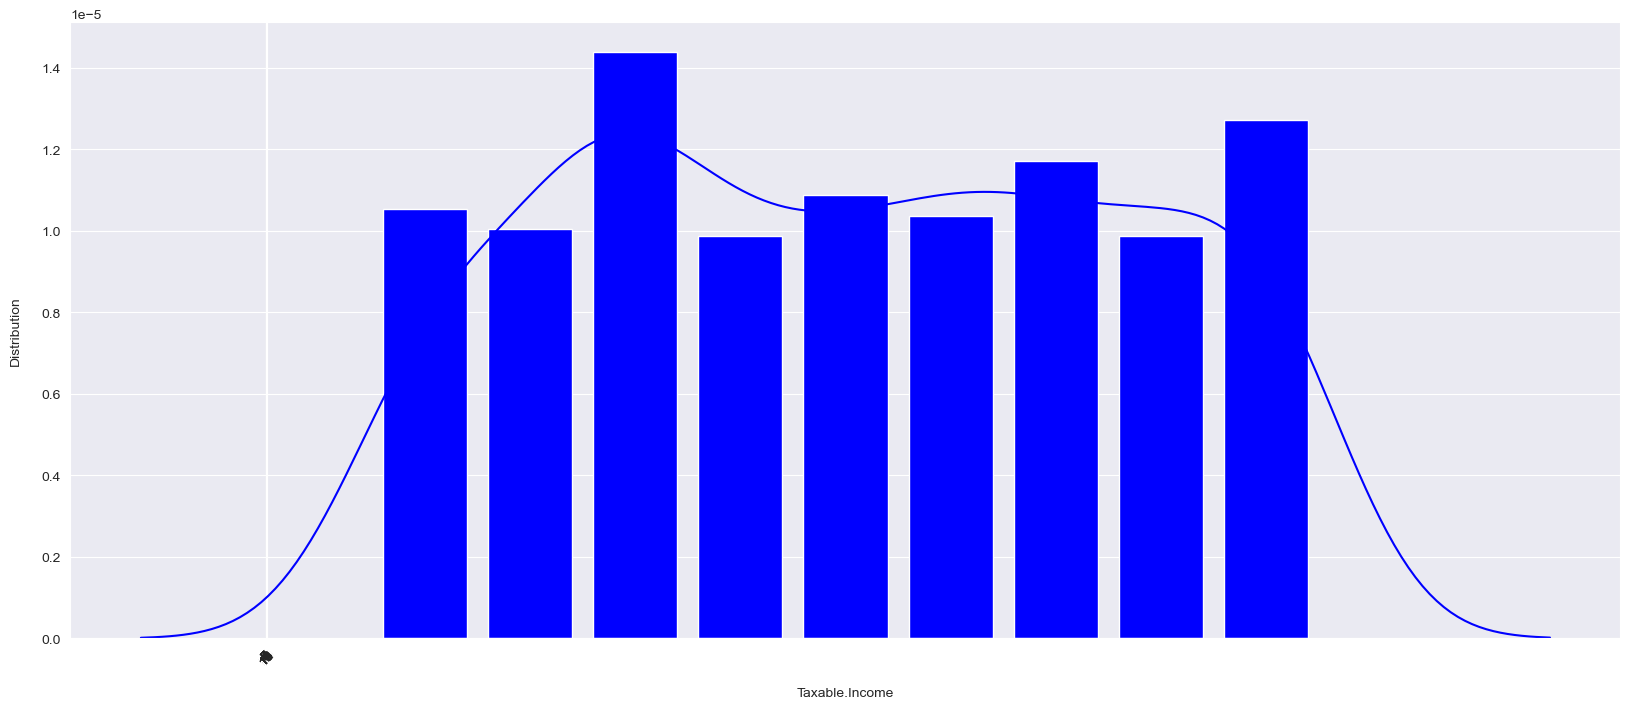

In [59]:
def distplot(param):
    plt.figure(figsize=(20,8))
    sns.distplot(df[param], color = "blue", hist_kws={"rwidth":0.80, 'alpha':1.0})
    plt.xticks(np.arange(0,20,1),rotation=45)
    plt.xlabel('\n'+param)
    plt.ylabel('Distribution\n')
    plt.show()
distplot("Taxable.Income")

### Data Visualization

In [60]:
categorical_features = df.describe(include=["object",'category']).columns
categorical_features

Index(['Undergrad', 'Marital.Status', 'Urban'], dtype='object')

In [61]:
numerical_features = df1.describe(include=["int64","float64"]).columns
numerical_features

Index(['Taxable.Income', 'City.Population', 'Work.Experience'], dtype='object')

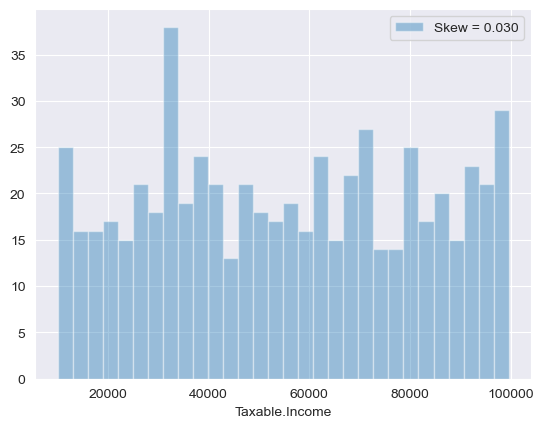

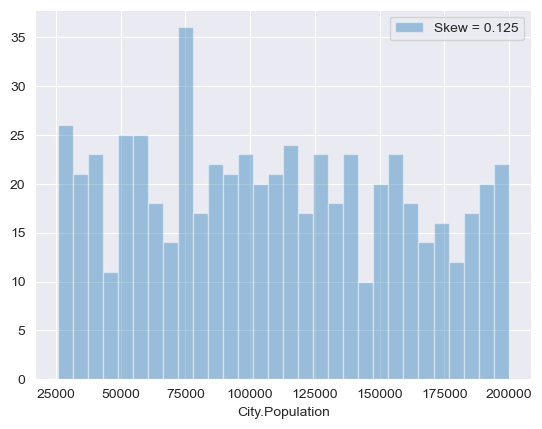

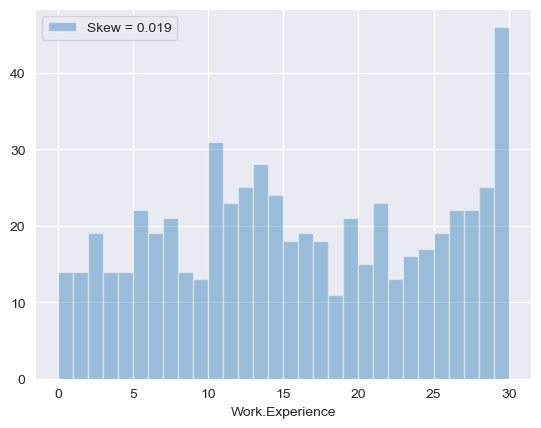

In [62]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
for feat in numerical_features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

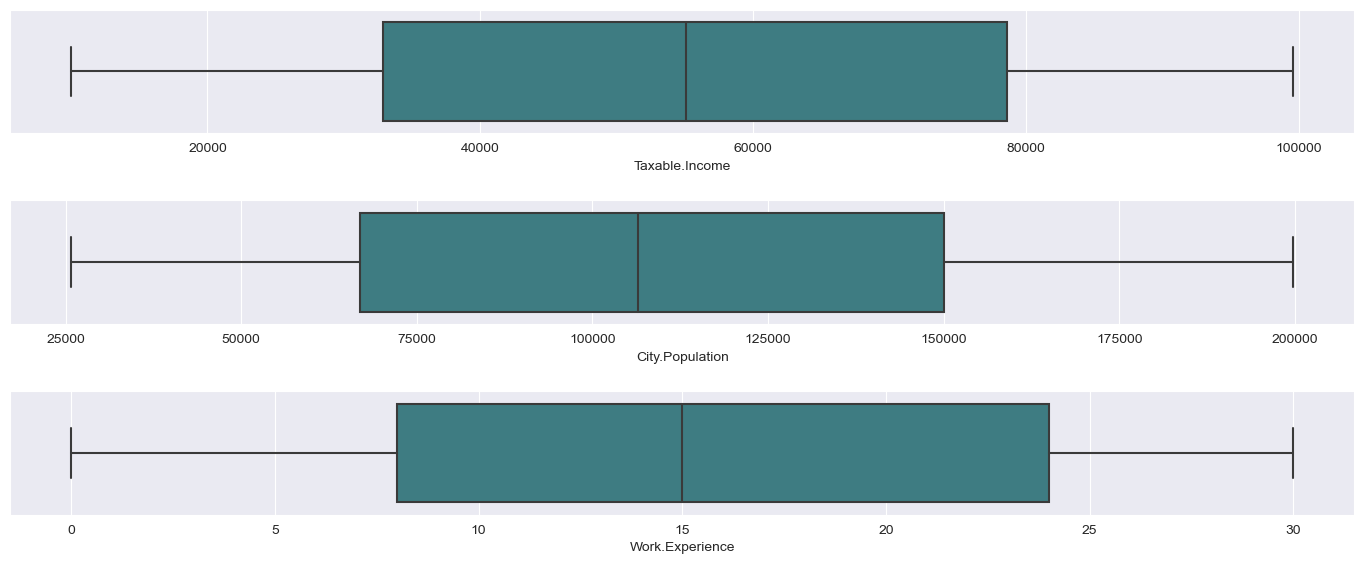

In [63]:
ot=df.copy() 
fig, axes=plt.subplots(3,1,figsize=(14,6),sharex=False,sharey=False)
sns.boxplot(x='Taxable.Income',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='City.Population',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Work.Experience',data=ot,palette='crest',ax=axes[2])
plt.tight_layout(pad=2.0)

<Axes: >

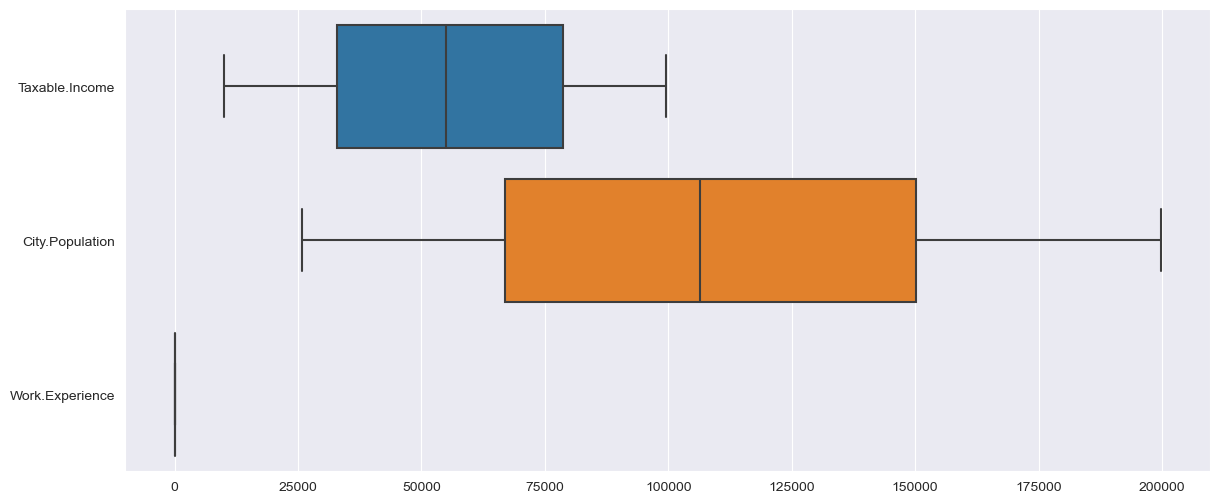

In [64]:
#outlier
plt.figure(figsize=(14,6))
sns.boxplot(data=df[numerical_features], orient="h")

<Figure size 800x800 with 0 Axes>

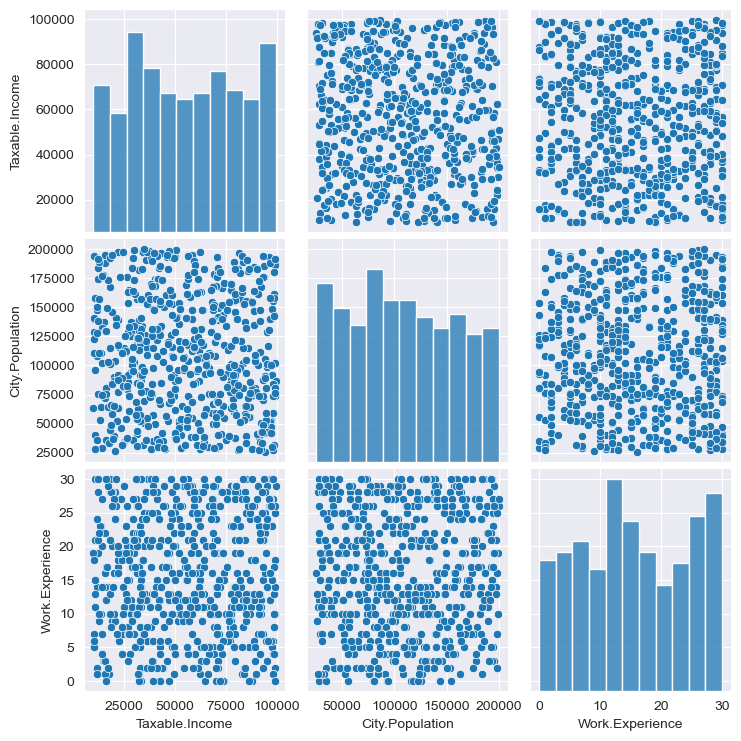

In [65]:
plt.figure(figsize=(8,8))
sns.pairplot(df, palette='coolwarm')
plt.show()

<Axes: >

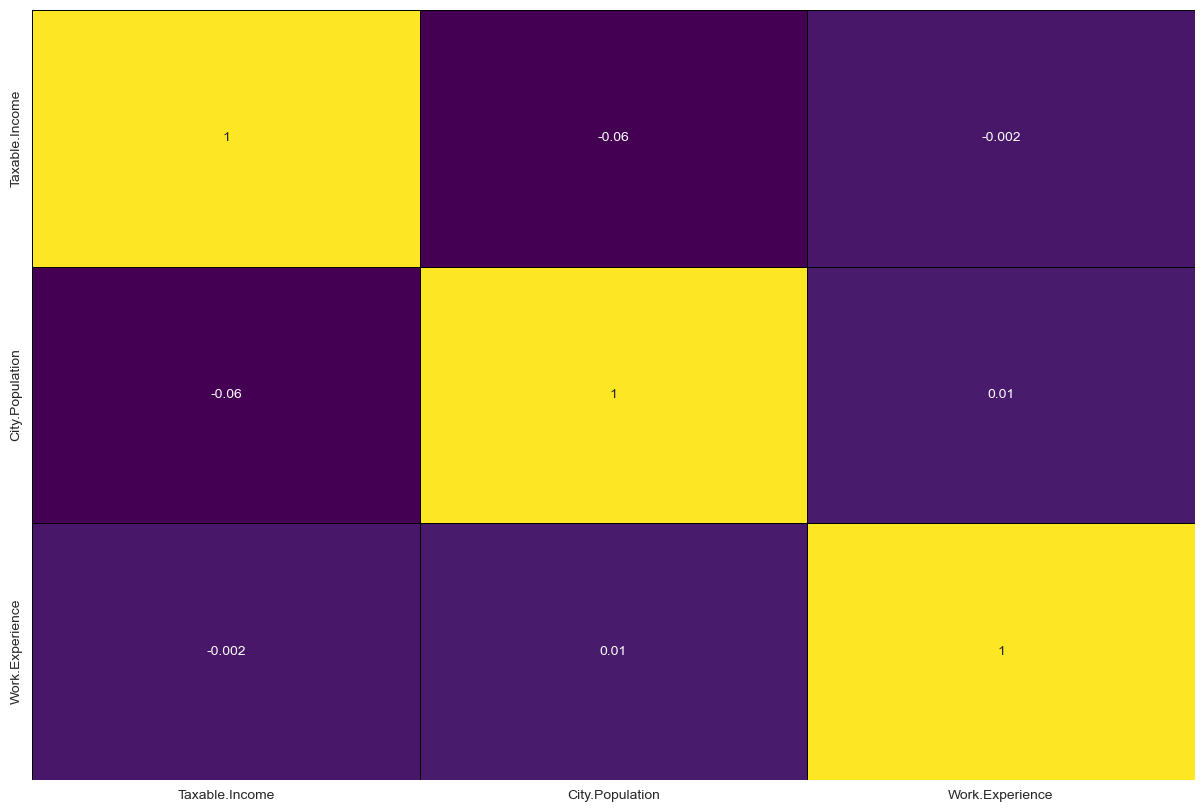

In [66]:
# Having a look at the correlation matrix

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')

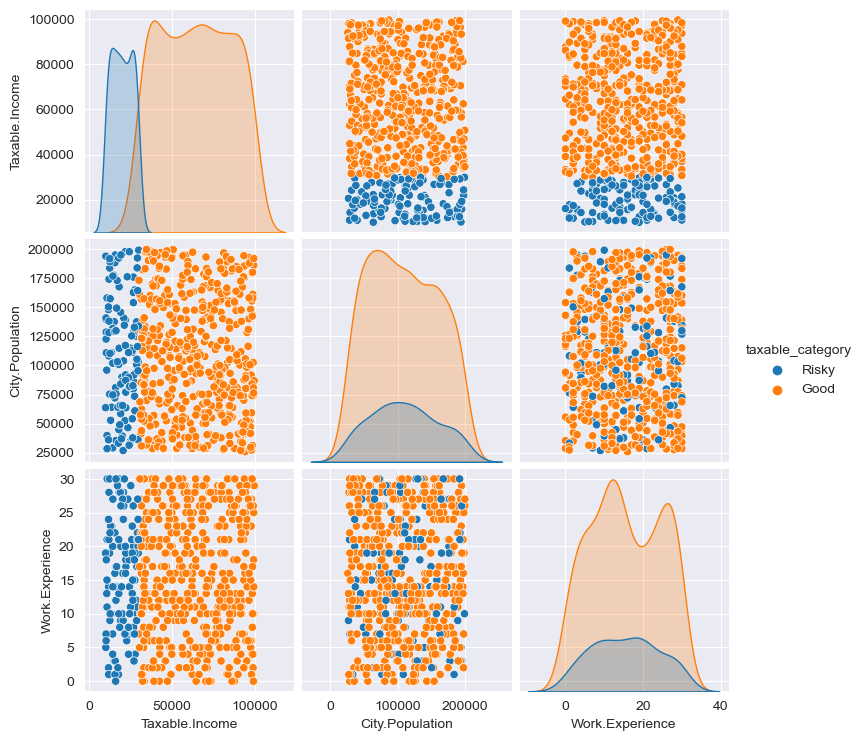

In [67]:
# let's plot pair plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data=df1, hue = 'taxable_category')

### Data Pre-processing

In [68]:
model_data = df1.copy()
model_data.rename(columns={'Marital.Status':'Marital_Status', 'Taxable.Income':'Taxable_Income','Work.Experience':'Work_Experience','City.Population':'City_Population'}, inplace = True)
model_data.drop('Taxable_Income', axis=1, inplace = True)
categorical_features = model_data.describe(include=["object",'category']).columns
categorical_features

Index(['Undergrad', 'Marital_Status', 'Urban', 'taxable_category'], dtype='object')

In [69]:
#Creating dummy vairables of the categorical features
le = LabelEncoder()
for col in categorical_features:
        le.fit(model_data[col])
        model_data[col] = le.transform(model_data[col])
model_data.head()

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,taxable_category
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


### Data Pre-processing for feature Selection

In [70]:
data_ = df1.copy()
data_.drop('Taxable.Income',axis=1, inplace =True)
data_ = pd.get_dummies(data_.iloc[:,:-1])
data_.head()

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,True,False,False,False,True,False,True
1,134075,18,False,True,True,False,False,False,True
2,160205,30,True,False,False,True,False,False,True
3,193264,15,False,True,False,False,True,False,True
4,27533,28,True,False,False,True,False,True,False


In [71]:
data_['Taxable_Income'] = df1.taxable_category
data_.head()

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Taxable_Income
0,50047,10,True,False,False,False,True,False,True,Good
1,134075,18,False,True,True,False,False,False,True,Good
2,160205,30,True,False,False,True,False,False,True,Good
3,193264,15,False,True,False,False,True,False,True,Good
4,27533,28,True,False,False,True,False,True,False,Good


In [72]:
le = LabelEncoder()
le.fit(data_["Taxable_Income"])
data_["Taxable_Income"]=le.transform(data_["Taxable_Income"])
data_.head()


,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Taxable_Income
0,50047,10,True,False,False,False,True,False,True,0
1,134075,18,False,True,True,False,False,False,True,0
2,160205,30,True,False,False,True,False,False,True,0
3,193264,15,False,True,False,False,True,False,True,0
4,27533,28,True,False,False,True,False,True,False,0


In [73]:
# split into input (X) and output (y) variables
X = data_.iloc[:, :-1]

y=  data_.Taxable_Income

In [74]:
#Feature importance
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, chi2

In [75]:
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

In [76]:
# summarize scores
scores = fit.scores_

features = fit.transform(X)

In [77]:
score_df = pd.DataFrame(list(zip(scores, X.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
0,2045.643886,City.Population
5,0.756912,Marital.Status_Married
4,0.302172,Marital.Status_Divorced
6,0.095850,Marital.Status_Single
2,0.048929,Undergrad_NO
3,0.045165,Undergrad_YES
1,0.011709,Work.Experience
7,0.007044,Urban_NO
8,0.006951,Urban_YES


### Model Building

In [78]:

model_data.columns

Index(['Undergrad', 'Marital_Status', 'City_Population', 'Work_Experience',
       'Urban', 'taxable_category'],
      dtype='object')

In [79]:
x = model_data.drop('taxable_category',axis=1)
y = model_data['taxable_category']

In [80]:
x

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [81]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: taxable_category, Length: 600, dtype: int32

In [82]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

In [85]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
ypred = rf.predict(x_test)
ypred

array([0.48, 0.31, 0.03, 0.05, 0.35, 0.12, 0.4 , 0.25, 0.06, 0.41, 0.29,
       0.11, 0.17, 0.16, 0.45, 0.23, 0.08, 0.31, 0.22, 0.7 , 0.45, 0.08,
       0.09, 0.06, 0.33, 0.42, 0.03, 0.24, 0.16, 0.09, 0.05, 0.21, 0.06,
       0.45, 0.45, 0.13, 0.52, 0.12, 0.16, 0.32, 0.19, 0.  , 0.37, 0.4 ,
       0.19, 0.39, 0.18, 0.03, 0.22, 0.48, 0.12, 0.41, 0.16, 0.18, 0.27,
       0.43, 0.19, 0.04, 0.42, 0.36, 0.14, 0.19, 0.15, 0.02, 0.2 , 0.29,
       0.29, 0.46, 0.34, 0.15, 0.19, 0.13, 0.29, 0.17, 0.24, 0.1 , 0.04,
       0.16, 0.37, 0.35, 0.53, 0.12, 0.21, 0.08, 0.11, 0.49, 0.56, 0.29,
       0.04, 0.07, 0.12, 0.07, 0.18, 0.15, 0.1 , 0.25, 0.11, 0.61, 0.21,
       0.12, 0.29, 0.15, 0.22, 0.04, 0.7 , 0.39, 0.22, 0.37, 0.65, 0.29,
       0.42, 0.17, 0.33, 0.47, 0.14, 0.08, 0.23, 0.55, 0.1 , 0.27, 0.02,
       0.2 , 0.34, 0.35, 0.12, 0.34, 0.09, 0.15, 0.52, 0.12, 0.39, 0.49,
       0.21, 0.2 , 0.47, 0.12, 0.26, 0.25, 0.52, 0.49, 0.12, 0.09, 0.31,
       0.43, 0.23, 0.04, 0.19, 0.43, 0.26, 0.24, 0.

In [87]:

from sklearn.metrics import r2_score, mean_squared_error, classification_report
r2_score(y_test,ypred)

-0.2256363636363634

In [89]:
np.sqrt(mean_squared_error(y_test, ypred))
print(np.sqrt(8.635751784313731))

2.9386649663263302


In [90]:
print(f"R2 values: {r2_score(y_test,ypred)}")
print(f"MSE: {mean_squared_error(y_test,ypred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test,ypred))}")

R2 values: -0.2256363636363634
MSE: 0.20014944444444444
RMSE: 0.44738064826771895


In [91]:
rf.estimators_

[DecisionTreeRegressor(max_features=1.0, random_state=901772228),
 DecisionTreeRegressor(max_features=1.0, random_state=996192631),
 DecisionTreeRegressor(max_features=1.0, random_state=2000818384),
 DecisionTreeRegressor(max_features=1.0, random_state=1351055521),
 DecisionTreeRegressor(max_features=1.0, random_state=1416894368),
 DecisionTreeRegressor(max_features=1.0, random_state=678387647),
 DecisionTreeRegressor(max_features=1.0, random_state=1267124344),
 DecisionTreeRegressor(max_features=1.0, random_state=2052577562),
 DecisionTreeRegressor(max_features=1.0, random_state=170890828),
 DecisionTreeRegressor(max_features=1.0, random_state=38727478),
 DecisionTreeRegressor(max_features=1.0, random_state=892198821),
 DecisionTreeRegressor(max_features=1.0, random_state=1419974798),
 DecisionTreeRegressor(max_features=1.0, random_state=1287305324),
 DecisionTreeRegressor(max_features=1.0, random_state=653532124),
 DecisionTreeRegressor(max_features=1.0, random_state=745476937),
 Dec

In [112]:
confusion_matrix(y_test,ypred)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [92]:
len(rf.estimators_)

100

In [93]:
rf.estimators_[99]

DecisionTreeRegressor(max_features=1.0, random_state=493961885)

In [94]:
x.columns

Index(['Undergrad', 'Marital_Status', 'City_Population', 'Work_Experience',
       'Urban'],
      dtype='object')

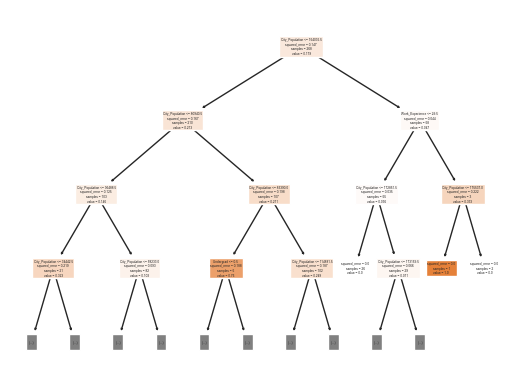

In [96]:
tree.plot_tree(rf.estimators_[0], feature_names=['Undergrad', 'Marital_Status', 'City_Population', 'Work_Experience',
       'Urban'],
              filled=True, max_depth=3)
plt.show()

### Applying K-Fold cross Validation

In [101]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold=KFold(n_splits=10)
results=cross_val_score(rf,x,y,cv=kfold)
print(results.mean())

-0.3294160391172487
